# $\sin^{2}(\theta_{W})$ Running Plot

Kurtis Bartlett

2017/3/15

Ipython notebook for generating the Marciano $\sin^{2}(\theta_{W})$ running with $Q^{2}$ plot.

Ref: A. Czarnecki and W. J. Marciano, Polarized Moller Scattering Asymmetries, Int. J. Modern Phys. A15, 2365 (2000)

In [1]:
# Import necessary packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# Use text and computer modern for text formating
pp.rcParams["text.usetex"] = "True"
pp.rcParams["font.family"] = "serif"
pp.rcParams["font.serif"] = "Computer Modern Roman"
pp.rcParams["font.sans-serif"] = "Computer Modern Sans serif"

In [4]:
# Keep matplotlib plots inline
%matplotlib inline

In [5]:
pp.style.use('seaborn-white')
sns.set_palette("muted")
plot_size = 6*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [40]:
# Constants
pi = np.pi
alpha = 1/137.035999139 # Fine structure constant Ref: PDG 2016
sin2thetaw = 0.22336 # On-shell (tree level) SM value of sin^2(theta_w) Ref: PDG 2016
cos2thetaw = 0.77664 # On-shell (tree level) SM value of cos^2(theta_w) calculated from sin2theta_w
sin2thetawmzmsb = 0.23129 # Value of sin^2(theta_w) evaluated at the Z-pole. Ref: PDG 2016

mw = 80.385 # Mass of W^{+-} boson [GeV/c^2] Ref: PDG 2016

In [41]:
# Define functions
def kappa_f(qq):
    'Fermion Loop Function'
    return 1.0

def kappa_b(qq):
    'Boson Loop Function'
    one_vec = np.ones(len(qq))
    
    z = (mw*mw*one_vec)/qq
    p = np.sqrt(one_vec + 4.0*z)
    
    term_one = ((-42.0*cos2thetaw + 1.0)/(12.0))*np.log(cos2thetaw)*one_vec
    
    term_two = (1.0/18.0)*one_vec
    
    term_three = (-0.5*one_vec*p*np.log((p + one_vec)/(p - one_vec))-one_vec)*(cos2thetaw*(7.0*one_vec-4.0*z) + (1.0/6.0)*one_vec*(one_vec + 4.0*z))
    
    term_four = -1.0*one_vec*z*((3.0/4.0)*one_vec - z + (z - (3.0/2.0)*one_vec)*p*np.log((p+one_vec)/(p-one_vec)) + z*(2.0*one_vec - z)*np.log((p + one_vec)/(p - one_vec))*np.log((p + one_vec)/(p - one_vec)))
    
    kappa = one_vec - ((alpha)/(2.0*pi*sin2thetaw))*one_vec*(term_one + term_two + term_three + term_four)
    return kappa

def sin2theta_w(qq):
    return 1.0

In [53]:
q = np.arange(1e-4,1e4)

In [54]:
boson = kappa_b(q*q)*sin2thetawmzmsb

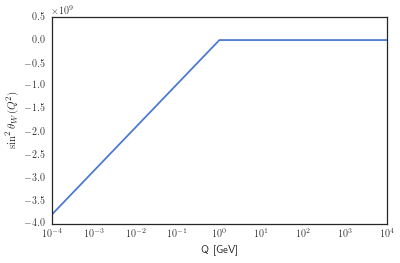

In [57]:
pp.figure(figsize=plot_size)
pp.plot(q, boson)
pp.xscale('log')
pp.xlabel('Q [GeV]')
pp.ylabel('$\\sin^{2}\\theta_{W}(Q^{2})$')
pp.show()